# PROJECT : CUSTOMER CHURN PREDICTION

This project leverages machine learning to anticipate and classify customer churn, providing invaluable insights for businesses seeking to retain their customer base. By analyzing historical data and customer behaviors, the predictive model identifies patterns indicative of potential churn, enabling proactive measures to enhance customer retention strategies. Through advanced analytics, the project empowers organizations to make data-driven decisions, optimize customer satisfaction, and ultimately mitigate churn.

### IMPORTING LIBRARIES

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATA

In [95]:
df=pd.read_csv('Churn_Modelling.csv')

In [96]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### BASIC INFORMATION OF DATASET

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [98]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
df.shape

(10000, 14)

### CHECK NULL VALUES

In [100]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [101]:
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)

In [102]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### STATISTICAL INFORMATION OF DATASET

In [103]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [104]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### UNIVARIATE AND BIVARIATE ANALYSIS

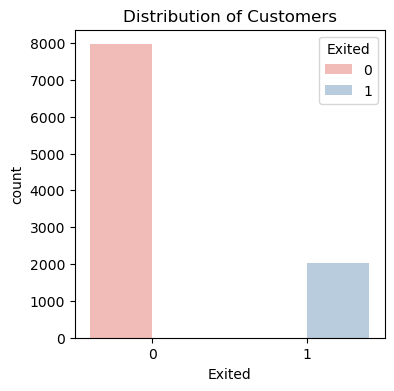

In [139]:
plt.figure(figsize = (4,4))
sns.countplot(x ="Exited", data = df, hue ="Exited", palette ="Pastel1")
plt.title("Distribution of Customers")
plt.show()

#### The univariate graph : Countplot indicates that the Non-excited Customers are more in the bank in this dataset.

"The univariate graph, Pie demonstrates that the Bank Customers from various Regions."


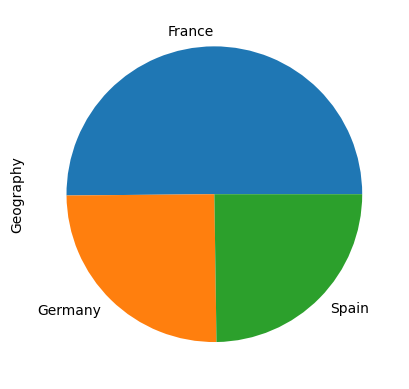

In [109]:
df['Geography'].value_counts().plot(kind='pie')

#### The univariate graph : Pie Chart demonstrates that the Bank Customers from various Regions.

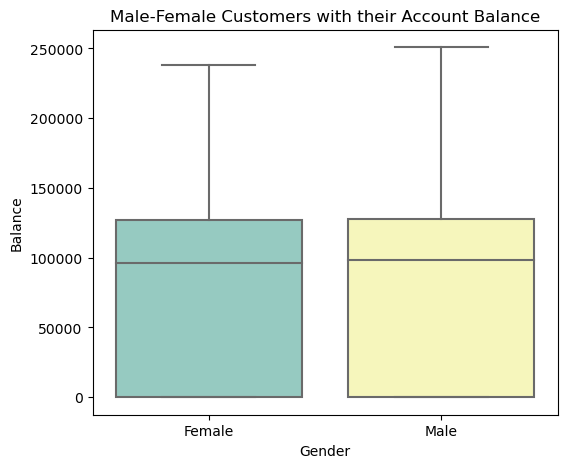

In [117]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='Balance', data=df, palette='Set3')
plt.title('Male-Female Customers with their Account Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

#### The Bivariate graph : This Boxplot shows that Comparison of Male and Female Customers of Balance in their Account. also, we can see here, Outliers are absent.

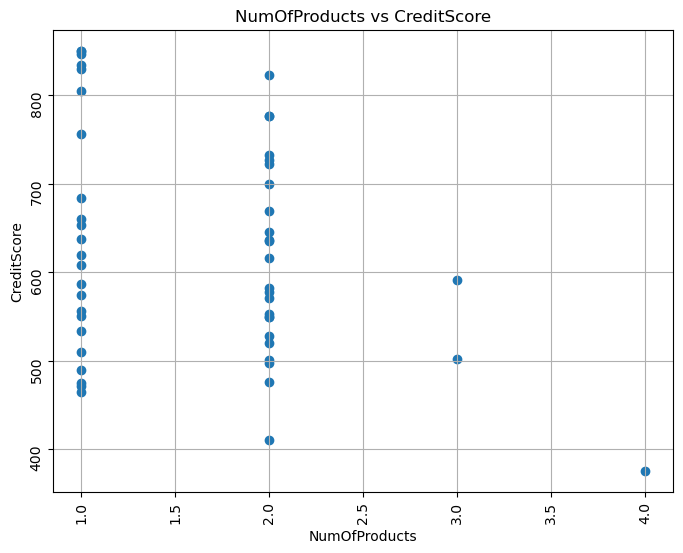

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['NumOfProducts'][0:50], y=df['CreditScore'][0:50])
plt.title('NumOfProducts vs CreditScore')
plt.xlabel('NumOfProducts')
plt.ylabel('CreditScore')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

#### The Bivariate graph : The Scatterplot shows the no. of Products held by customers with their Credit Score.

### ENCODING

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
od=OrdinalEncoder()
od.fit_transform(df[['Geography','Gender']])

array([[0., 0.],
       [2., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 0.]])

In [24]:
df.iloc[:,1:3]=od.fit_transform(df.iloc[:,1:3])

In [25]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8244,528,2.0,0.0,14.0,0.0,68138.37,1,1,1,170309.19,0
2759,709,0.0,1.0,19.0,7.0,0.00,1,1,0,159486.76,0
1262,665,2.0,0.0,22.0,1.0,173432.55,1,0,1,116766.79,0
9676,585,0.0,0.0,16.0,1.0,0.00,1,1,1,75503.60,0
9665,547,0.0,1.0,12.0,6.0,0.00,2,1,1,18471.86,0
4816,600,0.0,1.0,11.0,8.0,0.00,2,0,1,34747.43,0
7173,744,2.0,0.0,12.0,1.0,124037.28,1,1,1,142210.94,0
136,461,1.0,0.0,16.0,5.0,63663.93,1,0,1,167784.28,0
3161,470,2.0,1.0,16.0,9.0,0.00,2,0,1,89013.67,0
8857,624,0.0,1.0,18.0,6.0,0.00,2,0,0,84749.96,0


### SEPARATING INTO FEATURES AND TARGET COLUMNS

In [26]:
x=df.iloc[:,0:-1]
y=df['Exited']

### SPLITING THE DATA INTO TRAINING AND TESTING

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

### 1 - Predicting by using Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

cr=classification_report(ytest,ypred)
print(cr)
ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2373
           1       0.40      0.06      0.11       627

    accuracy                           0.78      3000
   macro avg       0.60      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000

Accuracy score :  0.7843333333333333


#### We have achieved an Accuracy of 78% which is not much good.

### HPT

In [30]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [31]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2373
           1       0.39      0.06      0.10       627

    accuracy                           0.78      3000
   macro avg       0.59      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000



#### By using Liblinear, we get 78% Accuracy.

In [32]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [33]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2373
           1       0.00      0.00      0.00       627

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



#### By using Saga, we get 79% Accuracy.

In [34]:
logreg=LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [35]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2373
           1       0.00      0.00      0.00       627

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



#### By using Sag also, we get 79% Accuracy.

### 2 - Predicting by using Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [37]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [38]:
mymodel(dt)

0.8
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2373
           1       0.52      0.54      0.53       627

    accuracy                           0.80      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



DecisionTreeClassifier()

#### Plotting Decision Tree

In [39]:
from sklearn import tree

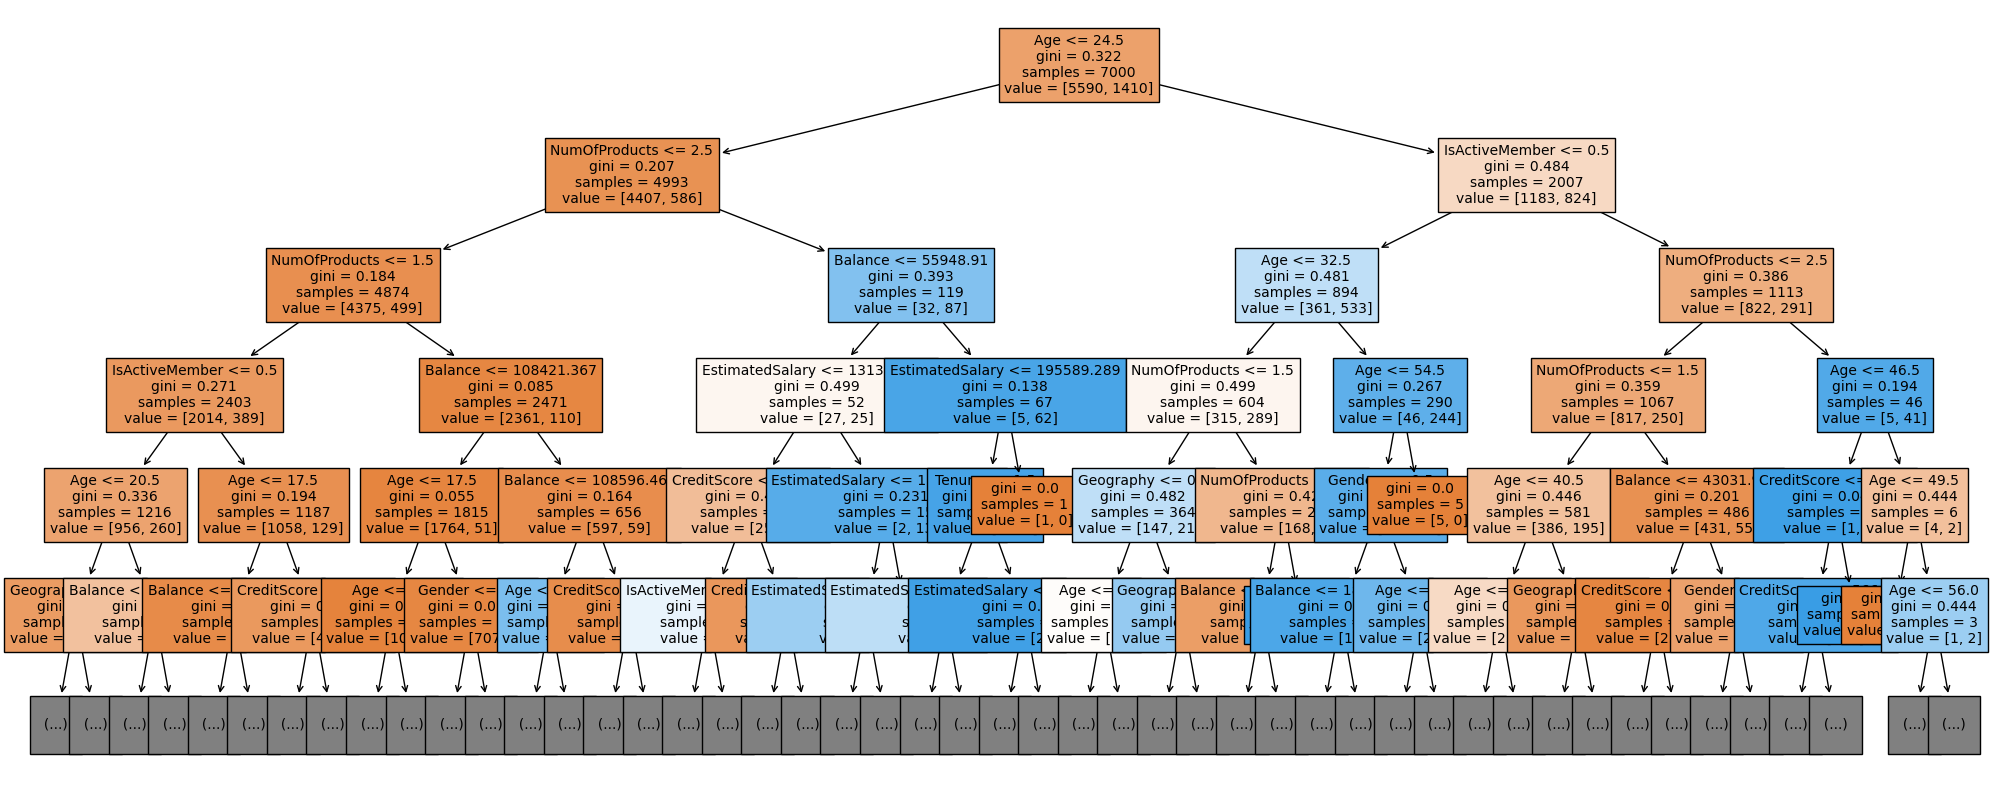

In [40]:
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt, max_depth =5, feature_names = x.columns, filled = True, fontsize=10)
plt.savefig("DecisionTree.jpg")

In [42]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :1.0 
test score : 0.8


Train acc is high and Test acc is low (Low bias high varience)
#### By using Decision Tree, we get 80% Accuracy. Let's check accuracy by HPT.

### HPT

### i - max_depth

In [43]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.7996666666666666
max_depth = 21 accuracy : 0.795
max_depth = 22 accuracy : 0.7963333333333333
max_depth = 23 accuracy : 0.7926666666666666
max_depth = 24 accuracy : 0.797
max_depth = 25 accuracy : 0.8013333333333333
max_depth = 26 accuracy : 0.7973333333333333
max_depth = 27 accuracy : 0.8026666666666666
max_depth = 28 accuracy : 0.7986666666666666
max_depth = 29 accuracy : 0.7963333333333333
max_depth = 30 accuracy : 0.799
max_depth = 31 accuracy : 0.793
max_depth = 32 accuracy : 0.7956666666666666
max_depth = 33 accuracy : 0.8013333333333333
max_depth = 34 accuracy : 0.7943333333333333


In [44]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.7933333333333333
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2373
           1       0.51      0.54      0.52       627

    accuracy                           0.79      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.80      0.79      0.80      3000



DecisionTreeClassifier(max_depth=24)

In [45]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :1.0 
test score : 0.7933333333333333


#### By using Decision Tree Max Depth function, we achive the accuracy of 79%

### ii - min_samples_split

In [46]:
for i in range(90,110):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_split = {i} accuracy : {ac}")

min_samples_split = 90 accuracy : 0.839
min_samples_split = 91 accuracy : 0.839
min_samples_split = 92 accuracy : 0.839
min_samples_split = 93 accuracy : 0.839
min_samples_split = 94 accuracy : 0.837
min_samples_split = 95 accuracy : 0.837
min_samples_split = 96 accuracy : 0.837
min_samples_split = 97 accuracy : 0.837
min_samples_split = 98 accuracy : 0.8396666666666667
min_samples_split = 99 accuracy : 0.8396666666666667
min_samples_split = 100 accuracy : 0.8396666666666667
min_samples_split = 101 accuracy : 0.8396666666666667
min_samples_split = 102 accuracy : 0.8396666666666667
min_samples_split = 103 accuracy : 0.8406666666666667
min_samples_split = 104 accuracy : 0.8406666666666667
min_samples_split = 105 accuracy : 0.8406666666666667
min_samples_split = 106 accuracy : 0.8406666666666667
min_samples_split = 107 accuracy : 0.8406666666666667
min_samples_split = 108 accuracy : 0.8403333333333334
min_samples_split = 109 accuracy : 0.8403333333333334


In [47]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.839
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2373
           1       0.67      0.46      0.54       627

    accuracy                           0.84      3000
   macro avg       0.77      0.70      0.72      3000
weighted avg       0.83      0.84      0.83      3000



DecisionTreeClassifier(min_samples_split=92)

In [48]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :0.8707142857142857 
test score : 0.839


#### By using Decision Tree Min Sample Split function, we achive the accuracy of 84%

### iii - min_samples_leaf

In [49]:
for i in range(30,50):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_leaf = {i} accuracy : {ac}")

min_samples_leaf = 30 accuracy : 0.85
min_samples_leaf = 31 accuracy : 0.85
min_samples_leaf = 32 accuracy : 0.85
min_samples_leaf = 33 accuracy : 0.85
min_samples_leaf = 34 accuracy : 0.8496666666666667
min_samples_leaf = 35 accuracy : 0.8423333333333334
min_samples_leaf = 36 accuracy : 0.844
min_samples_leaf = 37 accuracy : 0.844
min_samples_leaf = 38 accuracy : 0.844
min_samples_leaf = 39 accuracy : 0.8443333333333334
min_samples_leaf = 40 accuracy : 0.841
min_samples_leaf = 41 accuracy : 0.8406666666666667
min_samples_leaf = 42 accuracy : 0.844
min_samples_leaf = 43 accuracy : 0.8463333333333334
min_samples_leaf = 44 accuracy : 0.849
min_samples_leaf = 45 accuracy : 0.847
min_samples_leaf = 46 accuracy : 0.847
min_samples_leaf = 47 accuracy : 0.839
min_samples_leaf = 48 accuracy : 0.839
min_samples_leaf = 49 accuracy : 0.8356666666666667


In [50]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.849
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.73      0.44      0.55       627

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.83      3000



DecisionTreeClassifier(min_samples_leaf=44)

In [51]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :0.8578571428571429 
test score : 0.849


#### By using Decision Tree Min Samples Leaf function, we achive the accuracy of 84%

### 3 - Predicting by using KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [53]:
#evaluate the Model

from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.7543333333333333


#### By using KNN CLASSIFIER, we get 75% accuracy which is not good.

### 4 - Predicting by using Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.78      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.84      3000



#### By using Random Forest, we get 86% of accuracy.

### 5 - Predicting by using BOOSTING

### i - Adaboost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.48      0.58       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



#### By using AdaBoost Classifier, we get 86% of accuracy.

### ii - Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.45      0.58       627

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



#### By using Gradient Boosting algorithm we get 86% of accuracy.

### iii - XG Boosting

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.72      0.51      0.60       627

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000



#### By using XG Boost algorithm, we get 86% of accuracy.

## CONCLUSION

### Based on the above all Algorithm of accuracy scores, we should go ahead with Boosting and Random Forest.The best predictive model is Random Forest and Boosting, both have same accuracy 86%.